<a href="https://colab.research.google.com/github/nouval0425/Learning-Python/blob/main/Tugas_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

from google.colab import files
uploaded = files.upload()

Saving survey lung cancer.csv to survey lung cancer (1).csv


In [ ]:

df=pd.read_csv('survey lung cancer.csv')
df.sample(5)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
import pandas as pd
from abc import ABC, abstractmethod


class BaseModel(ABC):

    @abstractmethod
    def load_data(self):
        pass

    @abstractmethod
    def clean_columns(self):
        pass

    @abstractmethod
    def show_summary(self):
        pass


class LungCancerSurvey(BaseModel):

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None

    # 1. load CSV file
    def load_data(self):
        self.df = pd.read_csv(self.filepath)
        return self.df

    # 2. bersihkan nama kolom
    def clean_columns(self):
        self.df.columns = (
            self.df.columns.str.strip()
                            .str.replace(" ", "_")
                            .str.upper()
        )

    # 3. ringkasan awal
    def show_summary(self):
        print("=== DATA SUMMARY ===")
        print(self.df.head())
        print("\n=== STATISTIK ===")
        print(self.df.describe(include='all'))

    # 4. hitung jumlah responden
    def count_rows(self):
        return len(self.df)

    # 5. hitung distribusi gender
    def gender_distribution(self):
        return self.df["GENDER"].value_counts()

    # 6. rata-rata usia responden
    def average_age(self):
        return self.df["AGE"].mean()

    # 7. distribusi smoker (SMOKING)
    def smoking_distribution(self):
        return self.df["SMOKING"].value_counts()

    # 8. korelasi fitur dengan kanker paru
    def correlation_with_cancer(self):
        numeric_df = self.df.copy()
        # Map LUNG_CANCER to numeric values
        numeric_df["LUNG_CANCER"] = numeric_df["LUNG_CANCER"].map({"YES": 1, "NO": 0})
        # Drop non-numeric columns (like 'GENDER') before calculating correlation
        numeric_df = numeric_df.select_dtypes(include=[np.number])
        return numeric_df.corr()["LUNG_CANCER"].sort_values(ascending=False)

    # 9. jumlah penderita kanker
    def cancer_counts(self):
        return self.df["LUNG_CANCER"].value_counts()

    # 10. filter responden berdasarkan usia minimum
    def filter_by_min_age(self, min_age):
        return self.df[self.df["AGE"] >= min_age]


# ========================
#        MAIN PROGRAM
# ========================
if __name__ == "__main__":
    model = LungCancerSurvey("survey lung cancer.csv")

    model.load_data()
    model.clean_columns()
    model.show_summary()

    print("\nTotal responden :", model.count_rows())
    print("\nDistribusi gender:\n", model.gender_distribution())
    print("\nRata-rata usia:", model.average_age())
    print("\nDistribusi SMOKING:\n", model.smoking_distribution())
    print("\nKorelasi fitur dengan kanker paru:\n", model.correlation_with_cancer())
    print("\nJumlah YES/NO LUNG_CANCER:\n", model.cancer_counts())
    print("\nFilter usia >= 60:\n", model.filter_by_min_age(60).head())

=== DATA SUMMARY ===
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2             

=== HASIL PREDIKSI PASIEN ===
Input Pasien: {'GENDER': 'M', 'AGE': 69, 'SMOKING': 1, 'ANXIETY': 2, 'CHEST PAIN': 2, 'YELLOW_FINGERS': 2, 'WHEEZING': 3, 'SHORTNESS OF BREATH': 1, 'FATIGUE': 2, 'SWALLOWING DIFFICULTY': 2, 'COUGHING': 2}
Predicted Class : 0 (Tidak Berisiko)
Probability     : 0.12467
Rekomendasi     : Risiko rendah, pantau gejala dan jaga kesehatan.
=== Lung Cancer OOP + ML Demo ===
Loading data...
Fitting pipeline and training models...
Chosen model: LogisticRegression metric: 0.9622641509433962
  LogisticRegression: acc=0.9636, f1=0.9623
  RandomForest: acc=0.9545, f1=0.9533
  SVC: acc=0.9636, f1=0.9623
  GradientBoosting: acc=0.9545, f1=0.9533

Plotting target distribution and correlation heatmap (close plot windows to continue)...


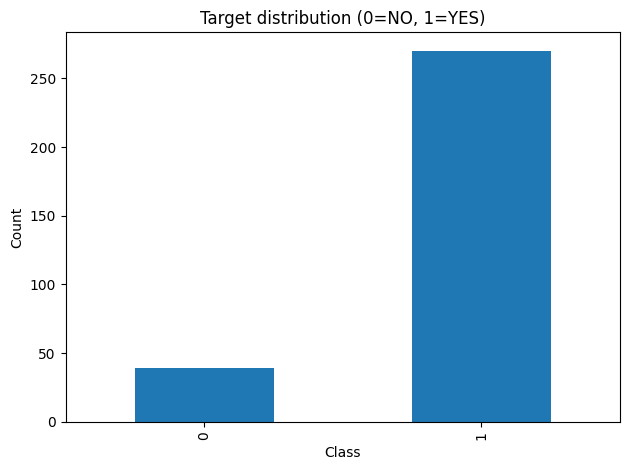

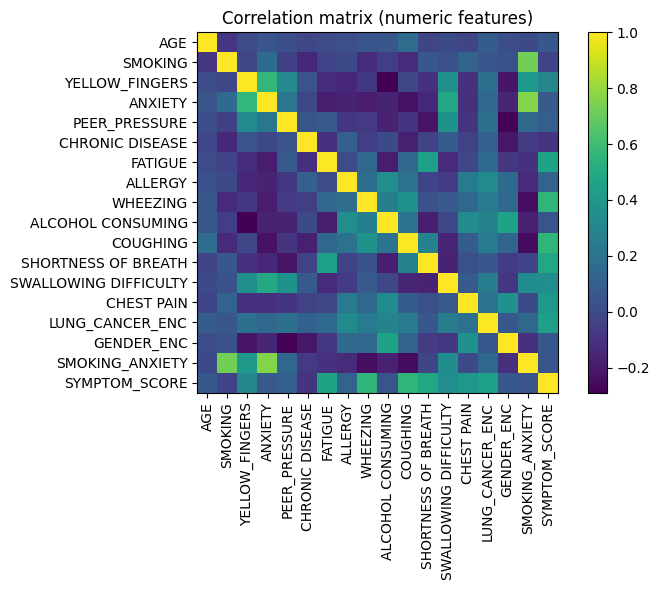


Loading sample for prediction (first row of CSV)...
Sample (partial): {'GENDER': 'M', 'AGE': 69, 'SMOKING': 1, 'YELLOW_FINGERS': 2, 'ANXIETY': 2, 'PEER_PRESSURE': 1}

Prediction result:
 Predicted class: 1
 Probability: 0.999
 Recommendation: Risiko tinggi, segera konsultasi ke dokter.

Saved model path: /content/main_model.pkl
Demo sample saved to: /content/demo_sample_patient.csv


In [ ]:
"""
lung_cancer_oop_pipeline.py

Simpan sebagai file .py dan jalankan. Pastikan dataset ada di DATA_PATH.
"""
import os
import pickle
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
try:
    from imblearn.over_sampling import ADASYN
    IMBLEARN_AVAILABLE = True
except Exception:
    IMBLEARN_AVAILABLE = False

DATA_PATH = "/content/survey lung cancer.csv"
SAVED_MODEL_PATH = "/content/main_model.pkl"

class LungCancerPipeline:
    """
    Base pipeline class providing data handling, feature engineering,
    model building, training and evaluation utilities.
    """
    def __init__(self, file_path=DATA_PATH, random_state=42):
        self.file_path = file_path
        self.random_state = random_state
        self.raw = None
        self.data = None
        self.label_encoders = {}
        self.models = {}
        self.results = {}
        self.scaler = None
        self.main_model_name = None

    def load_data(self):
        self.raw = pd.read_csv(self.file_path)
        self.raw.columns = [c.strip() for c in self.raw.columns]
        self.data = self.raw.copy()
        return self.data

    def encode_categorical(self):
        # Encode target label
        if "LUNG_CANCER" in self.data.columns:
            le = LabelEncoder()
            self.data["LUNG_CANCER_ENC"] = le.fit_transform(self.data["LUNG_CANCER"])
            self.label_encoders["LUNG_CANCER"] = le
        # Encode gender if present
        if "GENDER" in self.data.columns:
            le_g = LabelEncoder()
            self.data["GENDER_ENC"] = le_g.fit_transform(self.data["GENDER"])
            self.label_encoders["GENDER"] = le_g
        return self.data

    def feature_engineering(self):
        # Add combined feature: SMOKING_ANXIETY = SMOKING * ANXIETY
        if {"SMOKING", "ANXIETY"}.issubset(self.data.columns):
            self.data["SMOKING_ANXIETY"] = pd.to_numeric(self.data["SMOKING"], errors='coerce').fillna(0) * \
                                         pd.to_numeric(self.data["ANXIETY"], errors='coerce').fillna(0)
        # Symptom score: sum of some symptom columns (if present)
        symptom_cols = ["YELLOW_FINGERS","FATIGUE","WHEEZING","COUGHING",
                        "SHORTNESS OF BREATH","SWALLOWING DIFFICULTY","CHEST PAIN"]
        symptom_cols = [c for c in symptom_cols if c in self.data.columns]
        if symptom_cols:
            self.data["SYMPTOM_SCORE"] = self.data[symptom_cols].apply(lambda r: pd.to_numeric(r, errors='coerce').fillna(0).sum(), axis=1)
        # Drop raw label column to avoid leakage (we keep encoded)
        if "LUNG_CANCER" in self.data.columns:
            self.data = self.data.drop(columns=["LUNG_CANCER"])
        return self.data

    def prepare_xy(self, drop_columns=None):
        if drop_columns is None:
            drop_columns = []
        target = "LUNG_CANCER_ENC"
        if target not in self.data.columns:
            raise RuntimeError("Target not encoded. Call encode_categorical() first.")
        X = self.data.drop(columns=[target] + drop_columns)
        X = X.select_dtypes(include=[np.number])
        y = self.data[target].astype(int)
        return X, y

    def balance_data(self, X, y):
        # Use ADASYN if available, else simple random oversampling
        if IMBLEARN_AVAILABLE:
            sampler = ADASYN(random_state=self.random_state)
            X_res, y_res = sampler.fit_resample(X, y)
            return X_res, y_res
        else:
            df = X.copy()
            df['TARGET'] = y.values
            counts = df['TARGET'].value_counts()
            if len(counts) <= 1:
                return X, y
            max_count = counts.max()
            frames = []
            for cls, cnt in counts.items():
                part = df[df['TARGET'] == cls]
                if cnt < max_count:
                    part = part.sample(max_count, replace=True, random_state=self.random_state)
                frames.append(part)
            df_bal = pd.concat(frames).sample(frac=1, random_state=self.random_state).reset_index(drop=True)
            y_bal = df_bal['TARGET']
            X_bal = df_bal.drop(columns=['TARGET'])
            return X_bal, y_bal

    def split_data(self, X, y, test_size=0.2):
        return train_test_split(X, y, test_size=test_size, random_state=self.random_state, stratify=y)

    def build_models(self):
        # Parent uses a broad selection. Subclasses may override.
        self.models = {
            "LogisticRegression": LogisticRegression(max_iter=1000, random_state=self.random_state),
            "RandomForest": RandomForestClassifier(n_estimators=100, random_state=self.random_state),
            "SVC": SVC(probability=True, random_state=self.random_state),
            "GradientBoosting": GradientBoostingClassifier(random_state=self.random_state)
        }
        return self.models

    def train_and_evaluate_all(self, X_train, X_test, y_train, y_test, scale=True):
        # Fit scaler
        if scale:
            self.scaler = StandardScaler()
            X_train_scaled = self.scaler.fit_transform(X_train)
            X_test_scaled = self.scaler.transform(X_test)
        else:
            X_train_scaled = X_train.values
            X_test_scaled = X_test.values

        self.results = {}
        for name, model in self.models.items():
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            self.results[name] = {"accuracy": acc, "f1": f1, "model": model}
        return self.results

    def print_results(self):
        print("Model results:")
        for name, info in self.results.items():
            print(f"  {name}: accuracy={info['accuracy']:.4f} | f1={info['f1']:.4f}")

    def save_main_model(self, model_name, output_path=SAVED_MODEL_PATH):
        if model_name not in self.results:
            raise ValueError("Model name not in results.")
        artifact = {
            "scaler": self.scaler,
            "model": self.results[model_name]["model"],
            "label_encoders": self.label_encoders
        }
        # Ensure the directory exists before saving
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        with open(output_path, "wb") as f:
            pickle.dump(artifact, f)
        self.main_model_name = model_name
        return output_path

class LungCancerPredictor(LungCancerPipeline):
    """
    Subclass that runs the full pipeline and exposes predict_single method.
    """
    def __init__(self, file_path=DATA_PATH, random_state=42):
        super().__init__(file_path=file_path, random_state=random_state)
        self.chosen_model_name = None

    def fit_for_prediction(self, choose_by="f1", test_size=0.2, scale=True):
        # Full pipeline run
        self.load_data()
        self.encode_categorical()
        self.feature_engineering()
        X, y = self.prepare_xy()
        X_bal, y_bal = self.balance_data(X, y)
        X_train, X_test, y_train, y_test = self.split_data(X_bal, y_bal, test_size=test_size)
        self.build_models()
        results = self.train_and_evaluate_all(X_train, X_test, y_train, y_test, scale=scale)
        # Select best model
        best_name, best_val = None, -1.0
        for name, info in results.items():
            metric_val = info["f1"] if choose_by == "f1" else info["accuracy"]
            if metric_val > best_val:
                best_name, best_val = name, metric_val
        self.chosen_model_name = best_name
        path = self.save_main_model(self.chosen_model_name)
        return {"chosen": best_name, "metric": best_val, "save_path": path, "results": results}

    def predict_single(self, sample_dict=None, csv_path=None, threshold_recommendations=True):
        # Load saved artifact
        if not os.path.exists(SAVED_MODEL_PATH):
            raise FileNotFoundError("Saved model not found. Run fit_for_prediction() first.")
        with open(SAVED_MODEL_PATH, "rb") as f:
            artifact = pickle.load(f)
        model = artifact["model"]
        scaler = artifact["scaler"]
        label_encoders = artifact.get("label_encoders", {})

        # Load sample
        if csv_path:
            df_sample = pd.read_csv(csv_path)
            sample = df_sample.iloc[0].to_dict()
        elif sample_dict:
            sample = sample_dict
        else:
            raise ValueError("Provide sample_dict or csv_path")

        # Prepare template X columns (recreate pipeline to know columns)
        if self.data is None:
            self.load_data(); self.encode_categorical(); self.feature_engineering()
        X_template, _ = self.prepare_xy()
        # Build default row
        row = {c: 0 for c in X_template.columns}
        # Fill row from sample where possible
        for k, v in sample.items():
            k_str = k.strip()
            # handle common mapping
            if k_str == "GENDER" and "GENDER_ENC" in row:
                le = label_encoders.get("GENDER", None)
                if le:
                    try:
                        row["GENDER_ENC"] = int(le.transform([v])[0])
                    except:
                        row["GENDER_ENC"] = 1 if str(v).upper().startswith("M") else 0
            elif k_str in row:
                try:
                    row[k_str] = float(v)
                except:
                    row[k_str] = 0
            else:
                # maybe sample had encoded names directly (e.g., GENDER_ENC)V
                if k_str + "_ENC" in row:
                    try:
                        row[k_str + "_ENC"] = float(v)
                    except:
                        pass

        # Recompute derived features if present
        if "SMOKING_ANXIETY" in row:
            if row.get("SMOKING_ANXIETY", 0) == 0:
                try:
                    row["SMOKING_ANXIETY"] = float(sample.get("SMOKING", 0)) * float(sample.get("ANXIETY", 0))
                except:
                    row["SMOKING_ANXIETY"] = 0
        if "SYMPTOM_SCORE" in row:
            symptom_cols = ["YELLOW_FINGERS","FATIGUE","WHEEZING","COUGHING",
                            "SHORTNESS OF BREATH","SWALLOWING DIFFICULTY","CHEST PAIN"]
            score = 0
            for s in symptom_cols:
                if s in sample:
                    try:
                        score += float(sample[s])
                    except:
                        pass
                elif s in row:
                    try:
                        score += float(row[s])
                    except:
                        pass
            row["SYMPTOM_SCORE"] = score

        X_sample = pd.DataFrame([row])[X_template.columns]
        X_scaled = scaler.transform(X_sample)
        proba = None
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(X_scaled)[:,1][0]
        elif hasattr(model, "decision_function"):
            raw = model.decision_function(X_scaled)[0]
            proba = 1/(1+np.exp(-raw))
        else:
            proba = float(model.predict(X_scaled)[0])

        pred = int(proba >= 0.5)
        recommendation = None
        if threshold_recommendations:
            if proba > 0.8:
                recommendation = "Risiko tinggi, segera konsultasi ke dokter."
            elif proba > 0.5:
                recommendation = "Risiko sedang, perlu pemeriksaan lanjutan."
            else:
                recommendation = "Risiko rendah, pantau gejala dan jaga kesehatan."

        return {"prediction": pred, "probability": float(proba), "recommendation": recommendation, "input_row": row}

class LungCancerVisualizer(LungCancerPipeline):
    """
    Subclass that adds visualization and overrides build_models (polymorphism).
    """
    def __init__(self, file_path=DATA_PATH, random_state=42):
        super().__init__(file_path=file_path, random_state=random_state)

    def plot_target_distribution(self):
        if self.data is None:
            self.load_data(); self.encode_categorical(); self.feature_engineering()
        if "LUNG_CANCER_ENC" not in self.data.columns:
            self.encode_categorical()
        counts = self.data["LUNG_CANCER_ENC"].value_counts().sort_index()
        counts.plot(kind="bar")
        plt.title("Target distribution (0=NO, 1=YES)")
        plt.xlabel("Class")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    def plot_correlation_heatmap(self):
        if self.data is None:
            self.load_data(); self.encode_categorical(); self.feature_engineering()
        numeric = self.data.select_dtypes(include=[np.number])
        corr = numeric.corr()
        plt.figure(figsize=(8,6))
        plt.imshow(corr, interpolation='nearest')
        plt.colorbar()
        ticks = range(len(corr.columns))
        plt.xticks(ticks, corr.columns, rotation=90)
        plt.yticks(ticks, corr.columns)
        plt.title("Correlation matrix (numeric features)")
        plt.tight_layout()
        plt.show()

    def build_models(self):
        # Polymorphism: different behavior than parent (fewer models, different hyperparams)
        self.models = {
            "LogisticRegression_Small": LogisticRegression(max_iter=300, random_state=self.random_state),
            "RandomForest_Small": RandomForestClassifier(n_estimators=30, max_depth=6, random_state=self.random_state)
        }
        return self.models

def main_demo():
    print("=== Lung Cancer OOP + ML Demo ===")
    predictor = LungCancerPredictor()
    print("Loading data...")
    predictor.load_data()
    print("Fitting pipeline and training models...")
    fit_info = predictor.fit_for_prediction(choose_by="f1")
    print("Chosen model:", fit_info["chosen"], "metric:", fit_info["metric"])
    predictor.print_results = lambda: None  # no-op to avoid confusion
    # print results summary
    for m, info in fit_info["results"].items():
        print(f"  {m}: acc={info['accuracy']:.4f}, f1={info['f1']:.4f}")

    # Visualizations
    viz = LungCancerVisualizer()
    print("\nPlotting target distribution and correlation heatmap (close plot windows to continue)...")
    viz.plot_target_distribution()
    viz.plot_correlation_heatmap()

    # Demo prediction: use first row of original CSV
    print("\nLoading sample for prediction (first row of CSV)...")
    sample_df = pd.read_csv(DATA_PATH)
    sample = sample_df.iloc[0].to_dict()
    print("Sample (partial):", {k: sample[k] for k in list(sample.keys())[:6]})
    pred_out = predictor.predict_single(sample_dict=sample)
    print("\nPrediction result:")
    print(" Predicted class:", pred_out["prediction"])
    print(" Probability:", round(pred_out["probability"], 4))
    print(" Recommendation:", pred_out["recommendation"])

    print("\nSaved model path:", SAVED_MODEL_PATH)
    # Optional: create a small csv with sample for user
    demo_sample_path = "/content/demo_sample_patient.csv"
    pd.DataFrame([sample]).to_csv(demo_sample_path, index=False)
    print("Demo sample saved to:", demo_sample_path)

    # ===== Contoh Eksekusi Prediksi Pasien =====

# 1. Buat objek predictor
predictor = LungCancerPredictor("survey lung cancer.csv")

# 2. Latih model dan pilih model terbaik
predictor.fit_for_prediction()

# 3. Data pasien contoh (bisa dari dataset atau input manual)
contoh_pasien = {
    'GENDER': 'M',
    'AGE': 69,
    'SMOKING': 1,
    'ANXIETY': 2,
    'CHEST PAIN': 2,
    'YELLOW_FINGERS': 2,
    'WHEEZING': 3,
    'SHORTNESS OF BREATH': 1,
    'FATIGUE': 2,
    'SWALLOWING DIFFICULTY': 2,
    'COUGHING': 2
}

# 4. Lakukan prediksi
pred_output = predictor.predict_single(contoh_pasien)
pred_class = pred_output["prediction"]
prob = pred_output["probability"]
rekomendasi = pred_output["recommendation"]

# 5. Tampilkan hasil prediksi
print("=== HASIL PREDIKSI PASIEN ===")
print(f"Input Pasien: {contoh_pasien}")
print(f"Predicted Class : {pred_class} ({"Berisiko" if pred_class == 1 else "Tidak Berisiko"})")
print(f"Probability     : {prob:.5f}")
print(f"Rekomendasi     : {rekomendasi}")


if __name__ == "__main__":
    main_demo()
